In [2]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from tqdm import trange
import matplotlib.pyplot as plt

In [45]:
state = np.zeros(shape=(4, 4))
state[1][3] = 2
state[1][2] = 2
state[2][3] = 1
state[2][2] = 2
state[3][3] = 1
state[0][0] = 2
state[0][1] = 1
state[0][2] = 1
print(state)
for i in range(0, 4):
    prev = 3
    for j in range(2, -1, -1):
        if state[i][j] == 0:
            continue
        if state[i][prev] == 0:
            state[i][prev] = state[i][j]
            state[i][j] = 0
            continue
        if state[i][prev] == state[i][j] and prev != j:
            state[i][j] = 0
            state[i][prev - 1] = state[i][prev]
            while(prev < 4 and state[i][prev] == state[i][prev - 1]):
                state[i][prev] += 1
                state[i][prev - 1] = 0
                prev += 1
            prev -= 1
            continue
        if prev - 1 != j:
            prev -= 1
            state[i][prev] = state[i][j]
            state[i][j] = 0
        if state[i][j] != 0:
            prev = j
print(state)

[[2. 1. 1. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 3.]
 [0. 0. 0. 3.]
 [0. 0. 2. 1.]
 [0. 0. 0. 1.]]


In [46]:
state = np.zeros(shape=(4, 4))
state[1][3] = 2
state[1][2] = 2
state[2][3] = 1
state[2][2] = 2
state[3][3] = 1
state[0][0] = 2
state[0][1] = 1
state[0][2] = 1
print(state)
for i in range(0, 4):
    prev = 0
    for j in range(1, 4):
        if state[i][j] == 0:
            continue
        if state[i][prev] == 0:
            state[i][prev] = state[i][j]
            state[i][j] = 0
            continue
        if state[i][prev] == state[i][j] and prev != j:
            state[i][j] = 0
            state[i][prev + 1] = state[i][prev]
            while(prev >= 0 and state[i][prev] == state[i][prev + 1]):
                state[i][prev] += 1
                state[i][prev + 1] = 0
                prev -= 1
            prev += 1
            continue
        if prev + 1 != j:
            prev += 1
            state[i][prev] = state[i][j]
            state[i][j] = 0
        if state[i][j] != 0:
            prev = j
print(state)

[[2. 1. 1. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[3. 0. 0. 0.]
 [3. 0. 0. 0.]
 [2. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [47]:
state = np.zeros(shape=(4, 4))
state[1][3] = 2
state[1][2] = 2
state[2][3] = 1
state[2][2] = 2
state[3][3] = 1
state[0][0] = 2
state[0][1] = 1
state[0][2] = 1
print(state)
for j in range(0, 4):
    prev = 0
    for i in range(1, 4):
        if state[i][j] == 0:
            continue
        if state[prev][j] == 0:
            state[prev][j] = state[i][j]
            state[i][j] = 0
            continue
        if state[prev][j] == state[i][j] and prev != j:
            state[i][j] = 0
            state[prev + 1][j] = state[prev][j]
            while(prev >= 0 and state[prev][j] == state[prev + 1][j]):
                state[prev][j] += 1
                state[prev + 1][j] = 0
                prev -= 1
            prev += 1
            continue
        if prev + 1 != i:
            prev += 1
            state[prev][j] = state[i][j]
            state[i][j] = 0
        if state[i][j] != 0:
            prev = i
print(state)

[[2. 1. 1. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[2. 1. 1. 3.]
 [0. 0. 3. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [48]:
state = np.zeros(shape=(4, 4))
state[1][3] = 2
state[1][2] = 2
state[2][3] = 1
state[2][2] = 2
state[3][3] = 1
state[0][0] = 2
state[0][1] = 1
state[0][2] = 1
print(state)
for j in range(0, 4):
    prev = 3
    for i in range(2, -1, -1):
        if state[i][j] == 0:
            continue
        if state[prev][j] == 0:
            state[prev][j] = state[i][j]
            state[i][j] = 0
            continue
        if state[prev][j] == state[i][j] and prev != i:
            state[i][j] = 0
            state[prev - 1][j] = state[prev][j]
            while(prev < 4 and state[prev][j] == state[prev - 1][j]):
                state[prev][j] += 1
                state[prev - 1][j] = 0
                prev += 1
            prev -= 1
            continue
        if prev - 1 != i and state[prev - 1][j] == 0:
            prev -= 1
            state[prev][j] = state[i][j]
            state[i][j] = 0
        if state[i][j] != 0:
            prev = i
print(state)

[[2. 1. 1. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 1.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [2. 1. 3. 3.]]


In [49]:
class env2048(Env):
    def __init__(self):
        # Actions we can take, down, stay, up
        self.action_space = Discrete(4)
        # Temperature array
        low = np.empty(shape=(1, 4, 4,))
        low.fill(1)
        high = np.empty(shape=(1, 4, 4,))
        high.fill(10)
        t = np.array([0])
        self.observation_space = Box(low=np.array(low), high=np.array(high))
        # Set start temp
        self.state = np.zeros(shape=(4, 4))
    
    def right(self):
        state = np.copy(self.state)
        for i in range(0, 4):
            prev = 3
            for j in range(2, -1, -1):
                if state[i][j] == 0:
                    continue
                if state[i][prev] == 0:
                    state[i][prev] = state[i][j]
                    state[i][j] = 0
                    continue
                if state[i][prev] == state[i][j] and prev != j:
                    state[i][j] = 0
                    state[i][prev - 1] = state[i][prev]
                    while(prev < 4 and state[i][prev] == state[i][prev - 1]):
                        state[i][prev] += 1
                        state[i][prev - 1] = 0
                        prev += 1
                    prev -= 1
                    continue
                if prev - 1 != j:
                    prev -= 1
                    state[i][prev] = state[i][j]
                    state[i][j] = 0
                if state[i][j] != 0:
                    prev = j
        return state
    def left(self):
        state = np.copy(self.state)
        for i in range(0, 4):
            prev = 0
            for j in range(1, 4):
                if state[i][j] == 0:
                    continue
                if state[i][prev] == 0:
                    state[i][prev] = state[i][j]
                    state[i][j] = 0
                    continue
                if state[i][prev] == state[i][j] and prev != j:
                    state[i][j] = 0
                    state[i][prev + 1] = state[i][prev]
                    while(prev >= 0 and state[i][prev] == state[i][prev + 1]):
                        state[i][prev] += 1
                        state[i][prev + 1] = 0
                        prev -= 1
                    prev += 1
                    continue
                if prev + 1 != j:
                    prev += 1
                    state[i][prev] = state[i][j]
                    state[i][j] = 0
                if state[i][j] != 0:
                    prev = j
        return state
    def up(self):
        state = np.copy(self.state)
        for j in range(0, 4):
            prev = 0
            for i in range(1, 4):
                if state[i][j] == 0:
                    continue
                if state[prev][j] == 0:
                    state[prev][j] = state[i][j]
                    state[i][j] = 0
                    continue
                if state[prev][j] == state[i][j] and prev != j:
                    state[i][j] = 0
                    state[prev + 1][j] = state[prev][j]
                    while(prev >= 0 and state[prev][j] == state[prev + 1][j]):
                        state[prev][j] += 1
                        state[prev + 1][j] = 0
                        prev -= 1
                    prev += 1
                    continue
                if prev + 1 != i:
                    prev += 1
                    state[prev][j] = state[i][j]
                    state[i][j] = 0
                if state[i][j] != 0:
                    prev = i
        return state
    def down(self):
        state = np.copy(self.state)
        for j in range(0, 4):
            prev = 3
            for i in range(2, -1, -1):
                if state[i][j] == 0:
                    continue
                if state[prev][j] == 0:
                    state[prev][j] = state[i][j]
                    state[i][j] = 0
                    continue
                if state[prev][j] == state[i][j] and prev != i:
                    state[i][j] = 0
                    state[prev - 1][j] = state[prev][j]
                    while(prev < 4 and state[prev][j] == state[prev - 1][j]):
                        state[prev][j] += 1
                        state[prev - 1][j] = 0
                        prev += 1
                    prev -= 1
                    continue
                if prev - 1 != i and state[prev - 1][j] == 0:
                    prev -= 1
                    state[prev][j] = state[i][j]
                    state[i][j] = 0
                if state[i][j] != 0:
                    prev = i
        return state
    def reward(self):
        state = np.copy(self.state)
        reward = 0
        for i in range(4):
            for j in range(4):
                reward += state[i][j] ** 2
        return reward
    def done(self):
        state = np.copy(self.state)
        if sum(sum(state == self.up())) != 4 * 4:
            return False
        if sum(sum(state == self.down())) != 4 * 4:
            return False
        if sum(sum(state == self.left())) != 4 * 4:
            return False
        if sum(sum(state == self.right())) != 4 * 4:
            return False
        return True
    def addBlock(self):
        count = 0
        state = np.copy(self.state)
        for i in range(4):
            for j in range(4):
                if state[i][j] == 0:
                    count += 1
        count = random.randint(0, count)
        for i in range(4):
            for j in range(4):
                if state[i][j] == 0:
                    if count == 0:
                        state[i][j] = random.randint(1, 2)
                    count -= 1
        return state
    def maxBlock(self):
        state = np.copy(self.state)
        m = 0
        for i in range(4):
            for j in range(4):
                m = max(m, state[i][j])
        return m

    def step(self, action):
        # Apply action
        # 0 -1 = -1 temperature
        # 1 -1 = 0 
        # 2 -1 = 1 temperature 
        if action == 0:
            self.state = self.up()
        if action == 1:
            self.state = self.down()
        if action == 2:
            self.state = self.left()
        if action == 3:
            self.state = self.right()
        
        self.state = self.addBlock()

        # Calculate reward
        reward = self.reward()
        
        # Check if shower is done
        done = self.done()
        if done: reward = 0
        
        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}
        
        # Return step information
        return self.state, reward, done, info
    def render(self):
        print(self.state)
    
    def reset(self):
        # Reset shower temperature
        self.state = np.zeros(shape=(4, 4))
        self.state[random.randint(0,3)][random.randint(0,3)] = random.randint(1,2)
        return self.state
    

In [50]:
env = env2048()

In [51]:
env.observation_space.sample()

array([[[4.1760945, 9.1883335, 3.4230816, 6.9451976],
        [9.713764 , 9.895732 , 2.873165 , 8.853717 ],
        [6.79294  , 2.6823795, 3.6596565, 1.8220351],
        [1.417963 , 8.963317 , 5.108679 , 6.6247616]]], dtype=float32)

In [52]:
max_score = []

In [53]:
episodes = 100000
for episode in trange(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    while not done:
        # env.render()
        action = env.action_space.sample()
        # print(action)c
        n_state, reward, done, info = env.step(action)
        score+=reward
    max_score.append(env.maxBlock())
    # print('Episode:{} Score:{}'.format(episode, score))

100%|██████████| 100/100 [00:00<00:00, 203.35it/s]


In [54]:
max_score

[6.0,
 7.0,
 8.0,
 6.0,
 6.0,
 6.0,
 7.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0,
 7.0,
 7.0,
 6.0,
 6.0,
 8.0,
 5.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0,
 8.0,
 6.0,
 6.0,
 8.0,
 5.0,
 7.0,
 5.0,
 7.0,
 5.0,
 6.0,
 7.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 8.0,
 5.0,
 8.0,
 7.0,
 5.0,
 7.0,
 6.0,
 7.0,
 7.0,
 7.0,
 5.0,
 7.0,
 6.0,
 8.0,
 7.0,
 6.0,
 7.0,
 6.0,
 7.0,
 7.0,
 7.0,
 6.0,
 8.0,
 6.0,
 7.0,
 5.0,
 7.0,
 5.0,
 8.0,
 8.0,
 6.0,
 7.0,
 7.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 6.0,
 7.0,
 7.0,
 7.0,
 6.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0]

Plotting the Distribution of max block from random moves

(array([10., 36., 43., 11.]),
 array([5.  , 5.75, 6.5 , 7.25, 8.  ]),
 <BarContainer object of 4 artists>)

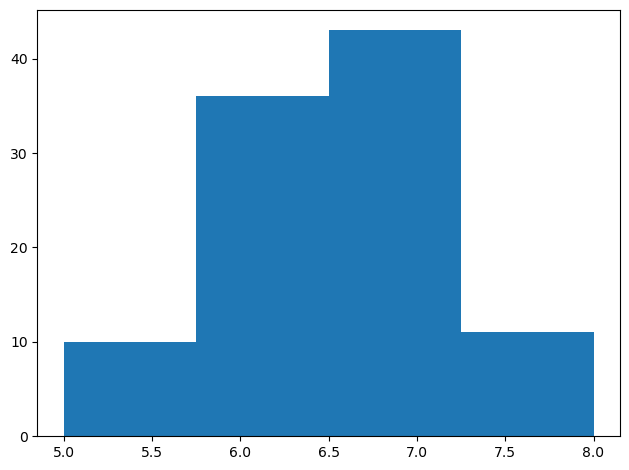

In [55]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(max_score, bins=len(set(max_score)))

In [56]:
states = env.observation_space.shape
actions = env.action_space.n

In [57]:
actions

4

In [58]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [59]:
model = build_model(states, actions)
del model
model = build_model(states, actions)

In [60]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1, 4, 24)          120       
                                                                 
 dense_19 (Dense)            (None, 1, 4, 24)          600       
                                                                 
 flatten_7 (Flatten)         (None, 96)                0         
                                                                 
 dense_20 (Dense)            (None, 4)                 388       
                                                                 
Total params: 1,108
Trainable params: 1,108
Non-trainable params: 0
_________________________________________________________________


In [ ]:
episodes = 100
for episode in trange(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    while not done:
        # env.render()
        action = env.action_space.sample()
        # print(action)c
        n_state, reward, done, info = env.step(action)
        score+=reward
    max_score.append(env.maxBlock())
    # print('Episode:{} Score:{}'.format(episode, score))